# **Question 1 : Visualizing Pleiades cluster**

Our beloved astronomy club, Krittika, is named after one of the most conspicuous star cluster in the sky, Pleiades. The CSV file stardata.csv
contains four columns of data, which contain the following data for 196 stars in the cluster:


*   Column 1: RA of each star in degrees
*   Column 2: Declination of each star in degrees
*   Column 3: Parallax of each star in milliarcseconds (mas)
*   Column 4: Apparent Magnitude of the star


Parallax $p$ of a star is directly related to its distance $d$ as $d$ in parsecs $= \frac{1}{p}$ where parallax is in arcseconds.

Before proceeding, you need to be able to read the csv file contents, and since the assignment involves graphs, you might want to import some things as well:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

A little background on magnitude of a star:

Magnitudes in Astronomy are a way to describe how bright an object (in our case, a star) is:

**Apparent magnitude**: Apparent magnitude ($m$) is a measure of the brightness of a star or any other astronomical object observed from the earth. It is similar to the decibel system for sound in that magnitudes are logarithmic and can be calculated according to the formula
$$m = -2.5 \log  { \left ( \dfrac{F}{F_0} \right )} $$
where $F$ is the flux from the star (measured in $W/m^2$), and $F_0$ is a reference flux. 

We can calculate the flux of a star at some distance $d$ away as
$$F = \dfrac{L}{4 \pi d^2}$$

where $L$ is the Luminosity of the star (measured in W).

**Absolute magnitude**: It is the magnitude of the star at a distance of 10 pc, and is related to the apparent magnitude by (and try to see if you can derive this):
$$m-M = -5 + 5\log_{10}(d)$$
where $M$ is the absolute magnitude and $d$ is the distance of the star from us in parsecs (pc).
To read up more about magnitudes, hit up this Wikipedia article - https://en.wikipedia.org/wiki/Magnitude_(astronomy%29.

Using the above info and the earlier relation of distance and parallax, use the imported libraries to find the absolute magnitudes of all the stars of the csv file, and plot a histogram of the distribution, with 50 bins.

Text(0.5, 1.0, 'Histogram')

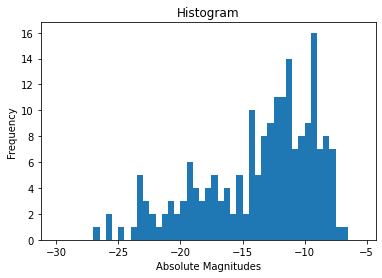

In [2]:
#Some of the data in the csv file use -- to show the absence of data, so we cannot use np.loadtext directly
star_data= np.genfromtxt('stardata.csv', delimiter=',') # a more general form of loadtxt

#now let us try to make it into useful arrays
ra=star_data[:, 0]
decline=star_data[:, 1]
para=star_data[:, 2]
app_mag=star_data[:, 3]

#d(in parsecs)= 1/p in arcseconds= 1e3/p in milli arcseconds
d=1e3/para
#M=m+5-5 log(d)
abs_mag= app_mag + 5 - 5 * np.log(d)

plt.hist(abs_mag,bins=np.arange(-30, -5, 0.5)) 
plt.xlabel('Absolute Magnitudes')
plt.ylabel('Frequency')
plt.title('Histogram')

A good way to visualize the actual star cluster as it appears to us in the night sky would be to make a scatter plot of declination and RA on the $y$ and $x$ axes respectively. Try plotting the stars such that the star appears bigger if it is brighter. One way to do this is to make the size of dots in scatter plot proportional to (12 - apparent magnitude) of the star.

(Hint: Google how to make a scatter plot with variable size of dots.)

If you can't make a plot with variable dot sizes, make a simple plot with all dots of same size.

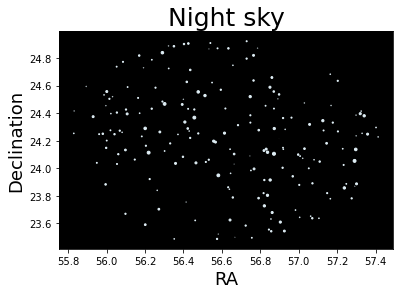

In [3]:
#for i in range(0, len(abs_mag)):
#    decline_i=np.array([])
#    ra_i=np.array([])
#    decline_i=np.append(decline_i, decline[i])
#    ra_i= np.append(ra_i, ra[i])
#    plt.scatter(decline_i, ra_i, s=12- abs_mag[i], c='r')
#--------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots() #now don't ask me what any of this means. I googled and tried to color my graph properly

ax.scatter(ra, decline, s=12-app_mag, c='#dfeef5') #used a slightly bluish hue
ax.set_facecolor("black")
plt.title("Night sky", fontsize=25)
  
plt.xlabel('RA', fontsize=18)
plt.ylabel('Declination', fontsize=18)
  
plt.show()

# **Question 2 : Estimating Age of Universe using Hubble's Law**

In this problem, we will use Hubble's Law on a large number of galaxies, and fit the data to a linear model to find the value of the Hubble Constant, which we will use to calculate the current age of the universe.

You can learn more about Hubble's Law, a very important principle of cosmology and expansion of Universe over here - https://simple.m.wikipedia.org/wiki/Hubble%27s_law 

Step 0: Importing libraries

Dump all the required libraries, and define any necessary constants in the code box below.

You will require the optimize module of scipy library, so be sure to include a line saying `from scipy.optimize import curve_fit`.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
%matplotlib inline

Step 2: Loading the data

Open the file "data.txt" and store it in array(s). First row contains the distance modulus (https://en.m.wikipedia.org/wiki/Distance_modulus) of the galaxy from earth, second row contains the line of sight velocity in km/s.

To convert distance modulus to distance in Megaparsecs (the unit we will be using in the rest of the question), use the formula:

$d = 10^{\left(\frac{d_{dist mod}}{5} - 5\right)}$

where $d$ is in megaparsecs (Mpc).

In [5]:
##we first use the open and read statements to read data from the txt file
#with open('data.txt', 'r') as f:
#    lines = f.read().split('\n')
#data_array = []
#for line in lines:
#    data_array.append(line.split(','))
#
#data_array.pop(0)#the header is useless for our purposes thus removed
#
#velocity=np.array([])
#distance=np.array([])

#This is to extract distances and velocities from data_array in the form of float numpy arrays
#for i in range(0, len(data_array)):
#    velocity=np.append(velocity, float(data_array[i][1]))
#    distance=np.append(distance,float(data_array[i][0]))

#--------------------------------------------------------------------------------------------------------
data_array=np.genfromtxt('data.txt', delimiter=',') # a more general form of loadtxt
data_array=np.delete(data_array, 0, axis=0)#To get rid of the title heading


velocity=data_array[:, 1]
distance=data_array[:, 0]

#now let us convert our distance into megaparsecs
distance=10**(distance/5 -5)

Step 3: Preliminary Data Visualization

Create a function taking the distance to the galaxy, and a slope and an intercept parameter as input, returning recession velocity of that galaxy as output. A code snippet showing how to use curve_fit to find the optimum slope and intercept is shown here - https://github.com/krittikaiitb/tutorials/blob/master/Tutorial_07/SciPy1.ipynb 

Create a scatter plot of the line of sight velocity of the galaxies (in km/s) vs the distance to the galaxies (in Mpc). Also plot the model you just fit in the same graph.

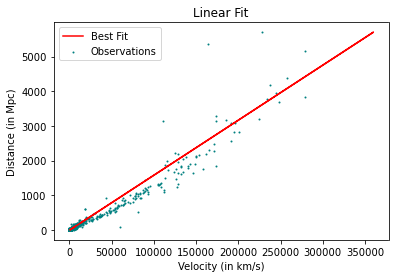

In [6]:
#To study the plot better, I thought it would be useful to temporarily elminate all the extremely high values of d and v
#indices=np.where(distance<200) # change this number as you want

#temp_dist=np.array([])
#temp_vel=np.array([])
#for i in indices:
#    temp_dist=np.append(temp_dist, distance[i])
#    temp_vel=np.append(temp_vel,velocity[i])
#velocity=np.copy(temp_vel)
#distance=np.copy(temp_dist)

#plt.scatter(velocity, distance, s=1,color='teal',label='Observations')
##plt.xscale("log") #I plotted the graph in logarithmic scale to see if there were any deviations from linearity in the smaller scale speeds- insignificant deviation was found.
##plt.yscale("log")
#plt.xlabel("Velocity (in km/s)")
#plt.ylabel("Distance (in Mpc)")
#plt.legend()
#--------------------------------------------------------------------------------------------------------

#After all of this plotting, I suspect that the curve is a linear one. Thus I will define a function which is linear

def linear_law(d, m, c):
    #d is the distance array, m is the slope, c is the intercept parameter
    return (d-c)/m #since distance is plotted on the y axis

p_opt, p_cov = cf(linear_law,distance,velocity)

plt.plot(linear_law(distance,*p_opt),distance,label='Best Fit',color='red')
plt.scatter(velocity, distance, s=1,color='teal',label='Observations')
plt.xlabel('Velocity (in km/s)')
plt.ylabel('Distance (in Mpc)')
plt.title('Linear Fit')
plt.legend()

#print("{:,}".format(3.086e+19*(p_opt[0]/3.154e+7))) at this point prints age of the universe in years and outputs a number like 15 billion years.
    

Step 4: Removing Outliers (OPTIONAL)

As you can see, there are many points on the outskirts of the graph, which may affect out calulations of the slope and intercept unduly. Devise a way to remove those outliers to your satisfaction, and replot the remaining data points. There are multiple ways to do this, a few of them could be:

1. Removing all points whose distances are 3$\times$(Standard Deviation of Distance from Earth) away from the Mean Distance of all input galaxies from Earth. (or take any factor other than 3)

2. Removing all points which are a certain distance away from the best fit line initially calculated (decide yourself what to set this distance as, could be a factor of the mean distance from the line for all points).

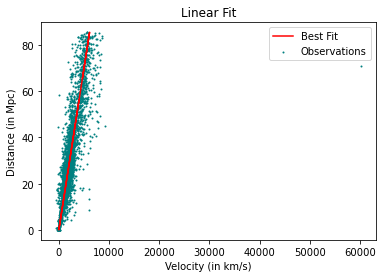

In [7]:
for i in range(0, 4): # This for loop basically ensures that we can get rid of extreme 5% and then extreme 5% of that subset and so on and so forth.
    #I found this method better as intuitively it felt better to iteratively decrease the width of subsequent graphs than drastically decreasing 
    #the width of the initial distribution
    mean_distance=np.mean(distance)
    standard_deviation=np.std(distance)
    #Since 95% of the observations fall within 2 standard deviations of the mean, I want to exclude the ones at the extreme 5%
    velocity=np.delete(velocity, np.where(distance>mean_distance+ 2 * standard_deviation))# this deletes whatever values correspond to distances that 
    #fall outside of the mean+ 2 * s.d. region of the distribution
    distance=np.delete(distance, np.where(distance>mean_distance+ 2 * standard_deviation))

p_opt, p_cov = cf(linear_law,distance,velocity)

plt.plot(linear_law(distance,*p_opt),distance,label='Best Fit',color='red')
plt.scatter(velocity, distance, s=1,color='teal',label='Observations')
plt.xlabel('Velocity (in km/s)')
plt.ylabel('Distance (in Mpc)')
plt.title('Linear Fit')
plt.legend()

#You can clearly see a much better fit with the refined subset



Step 5: Conclusion

The slope of the graph (with recessional velocity in the y-axis and distance of the galaxy in the x-axis) gives us the Hubble Constant $H_0$ (in units km/s-Mpc). The reciprocal of the Hubble Constant is a good approximation for the age of the universe. Hence, find the age of the universe using your calculations.

In [8]:
#Obviously the slope of the linear graph is stored in the array p_opt
print(f"Slope= Hubble constant = {1/p_opt[0]} km/s-Mpc")
number_of_years= "{:,}".format(3.086e+19*(p_opt[0]/3.154e+7))
print(f"Hence the age of the universe is = {p_opt[0]} Megaparsec/km s= {number_of_years} years")

Slope= Hubble constant = 71.53245684464804 km/s-Mpc
Hence the age of the universe is = 0.013979668029182456 Megaparsec/km s= 13,678,267,450.24003 years


In [9]:
#Thank you for your patience with all of these incredibly long and winding comments. <3